In [57]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json

In [3]:
with open("data/results.json") as f:
    data = json.load(f)

In [85]:
data.keys()

dict_keys(['chuffed', 'cp-sat', 'gecode', 'CPLEX', 'Picat'])

In [103]:
solver_name = "cp-sat"
solver = data[solver_name]
pairs = [(1, 2), (1, 4), (1, 8), (2, 4), (2, 8), (4, 8)] if solver_name != "cp-sat" else [(1,8)]

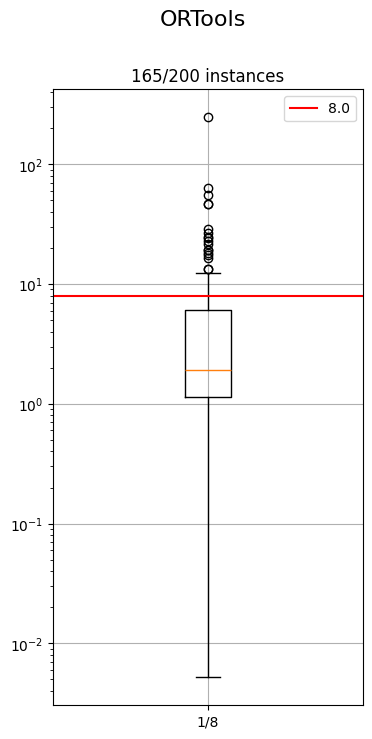

In [104]:
fig, axes = plt.subplots(1, len(pairs), figsize=((24 / 6) * len(pairs),8))
axes = axes if isinstance(axes, np.ndarray) else [axes]
fig.suptitle(solver_name if solver_name != "cp-sat" else "ORTools", fontsize=16)
for i, (k1, k2) in enumerate(pairs):
    s1 = solver[str(k1)]
    s2 = solver[str(k2)]
    s1 = sorted(s1, key= lambda x: x["model"]+x["name"])
    s2 = sorted(s2, key= lambda x: x["model"]+x["name"])
    t = [s1[i]["time"]/s2[i]["time"] for i in range(len(s1)) if s1[i]["objective"] == s2[i]["objective"]]
    axes[i].boxplot(t)
    axes[i].set_xticks([1])
    axes[i].set_title(f"{len(t)}/200 instances")
    axes[i].set_xticklabels([f'{k1}/{k2}'])
    axes[i].set_yscale("log")
    axes[i].axhline(k2 / k1, c='red', label=f"{k2 / k1}")
    axes[i].legend()
    axes[i].grid()
plt.savefig(f"data/figures/{solver_name}_improvement.pdf", format="pdf")
plt.show()

In [59]:
np.median(t), np.mean(t)

(np.float64(1.000028330122586), np.float64(1.6066760272331617))

In [22]:
s1[1]

{'name': 'FBDk06',
 'model': 'FBD1',
 'time': 11294,
 'objective': 103,
 'search': 'Minimise',
 'optimal': 'Optimal'}

In [23]:
s2[1]

{'name': 'FBDk06',
 'model': 'FBD1',
 'time': 5565,
 'objective': 103,
 'search': 'Minimise',
 'optimal': 'Optimal'}